In [1]:
%run lm_ode.ipynb

In [2]:
import matplotlib.pyplot as plt

# Model 2: Pyrolytic dehydrogenation model
Pyrolytic dehydrogenation of benzene to diphenyl and triphenyl
$$2C_2H_6\longleftrightarrow C_{12}H_{10}+H_2$$
$$C_6H_6+C_{12}H_{10}\longleftrightarrow C_{10}H_{14}+H_2$$
with differential equations model
\begin{align*}
\frac{dy_1}{dt}=&-r_1-r_2;\hspace{10mm}y_1(0)=1\\
\frac{dy_2}{dt}=&\frac{r_1}{2}-r_2;\hspace{10mm}y_2(0)=0\\
r_1=&k_1\left(y_1^2-y_2\frac{2-2y_1-y_2}{3K_1}\right)\\
r_2=&k_2\left(y_1y_2-\frac{(1-y_1-2y_2)(2-2y_1-y_2)}{9K_2}\right)
\end{align*}
with $K_1=0.242$ and $K_2=0.428$

## Scaling for parameter estimation
Let $u_1=\frac{y_1}{M_1}$ and $u_2=\frac{y_2}{M_2}$,
\begin{align*}
\frac{M_1}{t_c}\frac{du_1}{d\bar{t}}=&-k_1\left(M_1^2u_1^2-M_2u_2\frac{2-2M_1u_1-M_2u_2}{3K_1}\right)\\
&-k_2\left(M_1M_2u_1u_2-\frac{(1-M_1u_1-2M_2u_2)(2-2M_1u_1-M_2u_2)}{9K_2}\right)\\
=&-k_1M_1^2\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1^2\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)\\
\frac{du_1}{d\bar{t}}=&-k_1M_1t_c\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1t_c\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)
\end{align*}

\begin{align*}
\frac{M_2}{t_c}\frac{du_2}{d\bar{t}}=&\frac{k_1}{2}\left(M_1^2u_1^2-M_2u_2\frac{2-2M_1u_1-M_2u_2}{3K_1}\right)\\
&-k_2\left(M_1M_2u_1u_2-\frac{(1-M_1u_1-2M_2u_2)(2-2M_1u_1-M_2u_2)}{9K_2}\right)\\
=&\frac{k_1M_1^2}{2}\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1^2\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)\\
\frac{du_2}{d\bar{t}}=&\frac{k_1M_1t_c}{2}\frac{M_1}{M_2}\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1t_c\frac{M_1}{M_2}\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)
\end{align*}

Let $\bar{k_1}=k_1M_1t_c$, $\bar{k_2}=k_2M_1t_c$ and $\frac{M_2}{M_1}=\gamma$,
\begin{align*}
\frac{du_1}{d\bar{t}}=&-\bar{k}_1\left(u_1^2-\gamma u_2\frac{\frac{2}{M_1}-2u_1-\gamma u_2}{3K_1}\right)\\
&-\bar{k}_2\left(\gamma u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\gamma u_2)(\frac{2}{M_1}-2u_1-\gamma u_2)}{9K_2}\right)
\end{align*}
\begin{align*}
\frac{du_2}{d\bar{t}}=&\frac{\bar{k}_1}{2\gamma}\left(u_1^2-\gamma u_2\frac{\frac{2}{M_1}-2u_1-\gamma u_2}{3K_1}\right)\\
&-\frac{\bar{k}_2}{\gamma}\left(\gamma u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\gamma u_2)(\frac{2}{M_1}-2u_1-\gamma u_2)}{9K_2}\right)
\end{align*}

In [3]:
def model2_scaled(u,kbar,M1,M2):
    K1 = 0.242
    K2 = 0.428
    gamma = M2/M1
    r1 = u[0]**2-gamma*u[1]*(2/M1-2*u[0]-gamma*u[1])/(3*K1)
    r2 = gamma*u[0]*u[1]-(1/M1-u[0]-2*gamma*u[1])*(2/M1-2*u[0]-gamma*u[1])/(9*K2)
    dudt = np.empty(2)
    dudt[0] = -kbar[0]*r1-kbar[1]*r2
    dudt[1] = kbar[0]*r1/(2*gamma)-kbar[1]*r2/gamma
    return dudt

## Integration with estimated paramters

In [4]:
t = np.array([0,5.63,11.32,16.97,22.62,34.00,39.70,45.20,169.7],dtype='f')*1e-4
yhat = np.array([[1,0.828,0.704,0.622,0.565,0.499,0.482,0.470,0.443],
                   [0,0.0737,0.1130,0.1322,0.1400,0.1468,0.1477,0.1477,0.1476]],dtype='f')
y0 = yhat[:,0]
k = np.array([354.61,400.23])

In [5]:
tc = t[-1]
M1 = max(yhat[0,:])
M2 = max(yhat[1,:])
tbar = t/tc
uhat = np.diag([1/M1,1/M2])@yhat
u0 = uhat[:,0]
kbar = k*M1*tc

In [6]:
def model2(u,kbar):
    return model2_scaled(u,kbar,M1,M2)

In [7]:
res = integrator_jacobian(model2,u0,kbar,tbar)

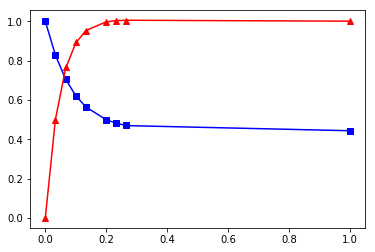

In [8]:
plt.plot(tbar,uhat[0,:],'bs',tbar,uhat[1,:],'r^')
plt.plot(tbar,res[0][0,:],'b',tbar,res[0][1,:],'r')

## Parameter estimation with LM mothod
### Test with given parameters

In [9]:
Q = np.eye(2)
k_est = lm(model2,uhat,Q,kbar,tbar,[1e-3,1e-4,1e-4,100])

Iteration | Objective function | Reduced gradient |   mu   |   rho
         0|          1.3624e-04|          1.22e-03| 1.1e-03| Not calculated
         1|          1.0880e-04|          1.86e-05| 3.7e-04| 1.2e+00


In [102]:
k_est
print(k_est[0]/(M1*tc))

[357.13631626 407.14534494]


### Initial guess with $k=[500,500]$

In [126]:
k0 = np.array([500,500])
kbar0 = k0*M1*tc
est = lm(model2,uhat,Q,kbar0,tbar,[1e-3,1e-8,1e-8,100])

Iteration | Objective function | Reduced gradient |   mu   |   rho
         0|          6.8843e-02|          2.39e-01| 8.6e-04| Not calculated
         1|          8.3497e-03|          9.34e-02| 2.9e-04| 1.6e+00
         2|          1.1069e-04|          1.04e-03| 9.5e-05| 2.0e+00
         3|          1.0882e-04|          6.30e-06| 3.2e-05| 1.9e+00
         4|          1.0880e-04|          7.56e-08| 1.1e-05| 1.8e+02
         5|          1.0883e-04|          7.56e-08| 2.1e-05|-1.5e+06
         6|          1.0882e-04|          7.56e-08| 8.5e-05|-1.1e+06
         7|          1.0880e-04|          7.56e-08| 6.8e-04|-1.9e+05
         8|          1.0883e-04|          7.56e-08| 1.1e-02|-1.1e+06
         9|          1.0882e-04|          7.56e-08| 3.5e-01|-1.9e+05
        10|          1.0877e-04|          1.55e-06| 1.2e-01| 1.9e+05
        11|          1.0862e-04|          1.01e-05| 3.8e-02| 2.6e+03
        12|          1.0877e-04|          1.01e-05| 7.7e-02|-8.3e+01
        13|          1.0882e-

In [127]:
print(est[0]/(M1*tc))

[357.1581939  407.21994252]


In [12]:
est

[array([6.06104816, 6.91088138]),
 array([[1.        , 0.82722262, 0.70379873, 0.61977012, 0.56275538,
         0.49786806, 0.48019915, 0.46863329, 0.44329832],
        [0.        , 0.50161358, 0.76085978, 0.88885947, 0.95141288,
         0.99526795, 1.0012687 , 1.00343103, 1.00025573]]),
 [3, 'g']]

### Initial guess with $k=[10000,10000]$

In [13]:
k0 = np.array([1e3,1e3])
kbar0 = k0*M1*tc
est = lm(model2,uhat,Q,kbar0,tbar,[1e-1,1e-8,1e-8,100])

Iteration | Objective function | Reduced gradient |   mu   |   rho
         0|          3.5888e-01|          3.64e-01| 4.1e-02| Not calculated
         1|          9.3714e-01|          3.64e-01| 8.2e-02|-1.5e-01
         2|          3.2835e-01|          5.56e-01| 1.6e-01| 5.0e-03
         3|          3.8401e-02|          1.07e-01| 2.3e-01| 1.2e-01
         4|          1.9526e-02|          3.03e-02| 3.9e-01| 5.5e-02
         5|          1.6134e-02|          2.49e-02| 7.1e-01| 3.2e-02
         6|          1.4479e-02|          2.34e-02| 1.3e+00| 3.4e-02
         7|          1.3599e-02|          2.27e-02| 2.3e+00| 3.6e-02
         8|          1.3120e-02|          2.24e-02| 4.2e+00| 3.7e-02
         9|          1.2857e-02|          2.22e-02| 7.4e+00| 3.7e-02
        10|          1.2712e-02|          2.21e-02| 1.3e+01| 3.7e-02
        11|          1.2631e-02|          2.20e-02| 2.4e+01| 3.7e-02
        12|          1.2586e-02|          2.20e-02| 4.3e+01| 3.7e-02
        13|          1.2561e-

In [14]:
est

[array([ 7.12610348, 10.58171716]),
 array([[1.        , 0.79996614, 0.6654987 , 0.58109146, 0.52859304,
         0.47583581, 0.46342662, 0.45599924, 0.44329368],
        [0.        , 0.54018249, 0.76889992, 0.86658768, 0.91392863,
         0.95864086, 0.9709478 , 0.97947851, 1.00024127]]),
 [27, 'h']]

In [15]:
kest = est[0]
est = lm(model2,uhat,Q,kest,tbar,[1e-1,1e-8,1e-8,100])

Iteration | Objective function | Reduced gradient |   mu   |   rho
         0|          1.2529e-02|          2.19e-02| 9.3e-02| Not calculated
         1|          5.1789e-03|          1.53e-02| 1.6e-01| 5.3e-02
         2|          2.7542e-03|          1.20e-02| 2.7e-01| 6.5e-02
         3|          1.8134e-03|          9.91e-03| 4.3e-01| 6.9e-02
         4|          1.3874e-03|          8.69e-03| 7.1e-01| 7.0e-02
         5|          1.1718e-03|          7.97e-03| 1.2e+00| 7.1e-02
         6|          1.0568e-03|          7.56e-03| 1.9e+00| 7.0e-02
         7|          9.9002e-04|          7.30e-03| 3.1e+00| 7.2e-02
         8|          9.5171e-04|          7.15e-03| 5.0e+00| 7.1e-02
         9|          9.2955e-04|          7.06e-03| 8.3e+00| 6.9e-02
        10|          9.1592e-04|          7.01e-03| 1.4e+01| 7.1e-02
        11|          9.0757e-04|          6.97e-03| 2.2e+01| 7.1e-02
        12|          9.0183e-04|          6.94e-03| 3.5e+01| 8.0e-02
        13|          8.9850e-

In [16]:
est

[array([6.29269332, 7.60646565]),
 array([[1.        , 0.82127383, 0.69521473, 0.61080158, 0.55453368,
         0.49213769, 0.47565735, 0.4650704 , 0.44329595],
        [0.        , 0.51159161, 0.76532185, 0.88599776, 0.94364908,
         0.98506101, 0.99190926, 0.99535795, 1.00024295]]),
 [24, 'h']]

In [17]:
kest = est[0]
res = integrator_jacobian(model2,u0,kest,tbar)

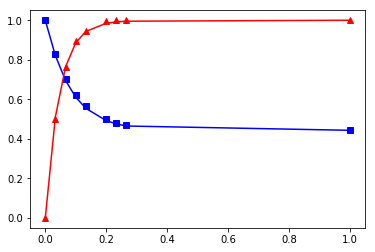

In [18]:
plt.plot(tbar,uhat[0,:],'bs',tbar,uhat[1,:],'r^')
plt.plot(tbar,res[0][0,:],'b',tbar,res[0][1,:],'r')

In [37]:
def Sg_ode(ode,yhat,Q,k,time):
    # check whether y is a scalar or a vector
    try:
        if np.size(yhat) == np.size(yhat,0):
            y0 = yhat[0]
            N = np.size(yhat)
        else:
            y0 = yhat[:,0]
            N = np.size(yhat,1)

        p = np.size(k)
        Y,J = integrator_jacobian(ode,y0,k,time)
        S,r = objective_func(yhat,Y,Q,N)
        return S
    except OverflowError:
        print("Problem with integration. Try with another parameters")
        return

In [120]:
k0 = np.array([5000,5000])
kbar0 = k0*M1*tc
Y,J = integrator_jacobian(model2,u0,kbar0,tbar)

In [121]:
S, r = objective_func(uhat,Y,Q,np.size(uhat,1))
H,g = Hg(J,Q,r,2,np.size(uhat,1))
K = np.diag(kbar0)
Hr = K@H@K
gr = K@g
hr = svdsolve(Hr,-gr)

In [122]:
h = K@hr
print(kbar0)
print(h)

[84.84999649 84.84999649]
[-2734.71969214  -628.48568586]


In [123]:
nx=100
alpha = np.linspace(0,1e-3,nx)

In [124]:
S = np.empty(nx)
for i in range(nx):
    S[i] = Sg_ode(model2,uhat,Q,kbar0+alpha[i]*h,tbar)

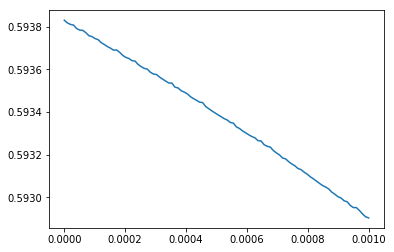

In [125]:
plt.plot(alpha,S)

In [60]:
hr = svdsolve(np.eye(2),-gr)

In [61]:
h = K@hr
print(h)

[-2.02465507  0.67693049]


In [51]:
S = np.empty(20)
for i in range(20):
    S[i] = Sg_ode(model2,uhat,Q,kbar0+alpha[i]*h,tbar)

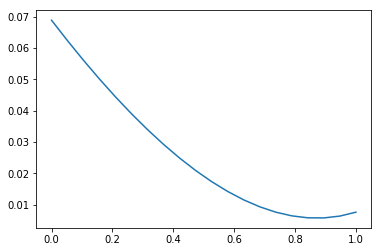

In [52]:
plt.plot(alpha,S)